<a href="https://colab.research.google.com/github/nelsonajayi/Coursera_Capstone/blob/master/ADFA_LSTM_Experiments_WD_SAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#This function converts trace files into list of lists suitable for sequential models.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import glob
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def convertStr2int(list):
    for i in range(0, len(list)):
        list[i] = int(list[i])
    return list

def program(location):
    l = [pd.read_csv(filename) for filename in glob.glob(location)]
    print(len(l))

    expectedResult = []

    for i in range(len(l)):
        templist = []
        templist = convertStr2int(l[i].columns.values.tolist()[0].split(" "))
        expectedResult.append(templist)

    return expectedResult

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ADFA_WD_&_WD_SAA.zip to ADFA_WD_&_WD_SAA.zip


In [5]:
import zipfile as zf
files = zf.ZipFile("ADFA_WD_&_WD_SAA.zip","r")
files.extractall("/ADFA_WD_&_WD_SAA")
files.close()

In [6]:
#Process ADFA-WD attack, validation and training traces
location = "/ADFA_WD_&_WD_SAA/ADFA_WD_&_WD_SAA/ADFA-WD/Full_Trace_Attack_Data/MERGED/*.GHC"

attack_wd=program(location)

5542


In [7]:
location = "/ADFA_WD_&_WD_SAA/ADFA_WD_&_WD_SAA/ADFA-WD/Full_Trace_Validation_Data/MERGED/*.GHC"
validation_wd=program(location)

1827


In [8]:
location = "/ADFA_WD_&_WD_SAA/ADFA_WD_&_WD_SAA/ADFA-WD/Full_Trace_Training_Data/MERGED/*.GHC"
training_wd=program(location)

355


In [9]:
location = "/ADFA_WD_&_WD_SAA/ADFA_WD_&_WD_SAA/ADFA-WD-SAA/MERGED/*.GHC"
attack_wd_saa=program(location)

862


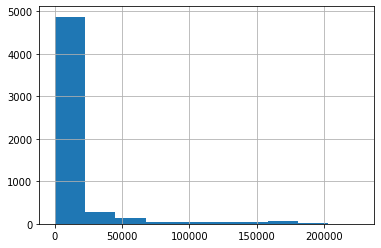

count      5542.000000
mean      13389.174305
std       30030.448594
min           1.000000
25%          30.000000
50%        1840.000000
75%       13345.000000
max      225973.000000
dtype: float64

In [10]:
attack_wd_len = [len(x) for x in attack_wd] 
training_wd_len = [len(x) for x in training_wd]
validation_wd_len = [len(x) for x in validation_wd]
attack_wd_saa_len = [len(x) for x in attack_wd_saa]
pd.Series(attack_wd_len).hist()
#plt.hist(attack_wd, bins=10)
plt.show()
pd.Series(attack_wd_len).describe()

In [11]:
df_attack_wd = pd.DataFrame(attack_wd_len,columns=['len'])
df_training_wd = pd.DataFrame(training_wd_len,columns=['len'])
df_validation_wd = pd.DataFrame(validation_wd_len,columns=['len'])
df_attack_wd_saa = pd.DataFrame(attack_wd_saa_len,columns=['len'])

In [12]:
df_attack_wd['len'].iplot(
    kind='hist',
    bins=200,
    xTitle='Sequence length',
    linecolor='black',
    yTitle='count',
    title='Text Length Distribution')

In [13]:
#Create labels for ADFA_WD dataset
attack_wd_label = [ 1 for i in range(len(attack_wd))]
training_wd_label =[ 0 for i in range(len(training_wd))]
validation_wd_label =[ 0 for i in range(len(validation_wd))]
attack_wd_saa_label = [ 1 for i in range(len(attack_wd_saa))]

In [14]:
from sklearn.model_selection import train_test_split
#Concatenate the ADFA-WD training and Validation into 1
X_wd_TrVal=np.concatenate((training_wd, validation_wd), axis=0).tolist()
y_wd_TrVal = np.concatenate((training_wd_label, validation_wd_label), axis=0).tolist()

<string>:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [15]:
np.random.seed(44)
#ADFA_WD: Split the Attack portion for training and validation
X_wd_TrVal_train1,X_wd_TrVal_test1,y_wd_TrVal_train1,y_wd_TrVal_test1 = train_test_split(X_wd_TrVal,y_wd_TrVal,test_size=0.08)
X_wd_TrVal_train2,X_wd_TrVal_test2,y_wd_TrVal_train2,y_wd_TrVal_test2 = train_test_split(X_wd_TrVal,y_wd_TrVal,test_size=0.67)
X_wd_Att_train,X_wd_Att_test,y_wd_Att_train,y_wd_Att_test = train_test_split(attack_wd,attack_wd_label,test_size=0.63)
X_wd_saa_Att_train,X_wd_saa_Att_test,y_wd_saa_Att_train,y_wd_saa_Att_test = train_test_split(attack_wd_saa,attack_wd_saa_label,test_size=0.16)

In [16]:
#Concatenate the ADFA-WD benign and attack
X1_tr=np.concatenate((X_wd_TrVal_train1, X_wd_Att_train), axis=0).tolist()
y1_tr=np.concatenate((y_wd_TrVal_train1, y_wd_Att_train), axis=0).tolist()
X1_te=np.concatenate((X_wd_TrVal_test1, X_wd_Att_test), axis=0).tolist()
y1_te=np.concatenate((y_wd_TrVal_test1, y_wd_Att_test), axis=0).tolist()

X2_tr=np.concatenate((X_wd_TrVal_train2, X_wd_saa_Att_train), axis=0).tolist()
y2_tr=np.concatenate((y_wd_TrVal_train2, y_wd_saa_Att_train), axis=0).tolist()
X2_te=np.concatenate((X_wd_TrVal_test2, X_wd_saa_Att_test), axis=0).tolist()
y2_te=np.concatenate((y_wd_TrVal_test2, y_wd_saa_Att_test), axis=0).tolist()

<string>:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [17]:
#LSTM Model for ADFA_WD
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from keras.regularizers import l2
import keras.callbacks as cb
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

In [18]:
X1_tr = sequence.pad_sequences(X1_tr, maxlen=2000)
X1_te = sequence.pad_sequences(X1_te, maxlen=2000)

X2_tr = sequence.pad_sequences(X2_tr, maxlen=2000)
X2_te = sequence.pad_sequences(X2_te, maxlen=2000)

In [19]:
K.clear_session()
#model1 = Sequential()
#model1.add(Embedding(9, 64, input_length=2000))
#model1.add(LSTM(32,dropout=0.1, return_sequences=True))
#model1.add(LSTM(32,dropout=0.1,kernel_regularizer=l2(0.001), recurrent_dropout=0, return_sequences=True))
#model1.add(LSTM(32, return_sequences=True))
#model1.add(LSTM(16, return_sequences=True))
#model1.add(LSTM(16))
#model1.add(Dense(1,activation='sigmoid'))

model1 = Sequential()
model1.add(Embedding(9, 128, input_length=2000))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(1,activation='sigmoid'))



In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1152      
_________________________________________________________________
lstm (LSTM)                  (None, 2000, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 2000, 128)         131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 313,793
Trainable params: 313,793
Non-trainable params: 0
_________________________________________________________________


In [21]:
X1_tr = np.array(X1_tr)
y1_tr = np.array(y1_tr)

In [22]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

history1 = model1.fit(X1_tr, y1_tr, batch_size=10, epochs=100, verbose=2, validation_split = 0.2)
model1.save('model1.h5')
print('Saved model to disk')

Epoch 1/100
325/325 - 76s - loss: 0.6620 - accuracy: 0.6071 - auc: 0.5753 - val_loss: 0.9966 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/100
325/325 - 64s - loss: 0.6588 - accuracy: 0.6185 - auc: 0.5337 - val_loss: 0.9369 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/100
325/325 - 64s - loss: 0.6523 - accuracy: 0.6188 - auc: 0.5589 - val_loss: 0.7979 - val_accuracy: 0.8350 - val_auc: 0.0000e+00
Epoch 4/100
325/325 - 64s - loss: 0.6161 - accuracy: 0.6077 - auc: 0.6454 - val_loss: 0.9493 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 5/100
325/325 - 64s - loss: 0.5967 - accuracy: 0.6327 - auc: 0.6750 - val_loss: 0.8741 - val_accuracy: 0.8399 - val_auc: 0.0000e+00
Epoch 6/100
325/325 - 64s - loss: 0.5761 - accuracy: 0.6339 - auc: 0.6987 - val_loss: 0.8996 - val_accuracy: 0.2734 - val_auc: 0.0000e+00
Epoch 7/100
325/325 - 64s - loss: 0.5640 - accuracy: 0.6465 - auc: 0.7132 - val_loss: 0.7153 - val_accuracy: 0.5862 - val_auc: 0.0000e+00
Epoch 8/100
325/325 - 

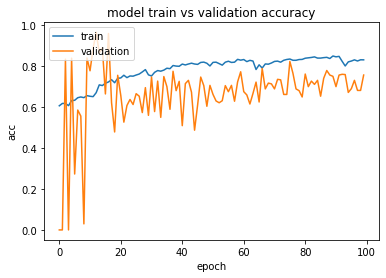

In [23]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history1.history['accuracy'])
pyplot.plot(history1.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

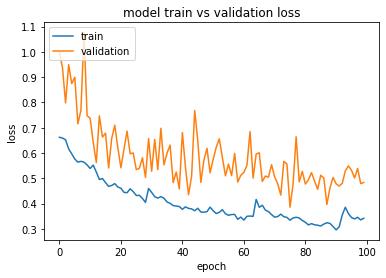

In [25]:
# plot train and validation loss
pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [26]:
X1_te = np.array(X1_te)
y1_te = np.array(y1_te)

In [27]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results1 = model1.evaluate(X1_te, y1_te, batch_size=10)
print("test loss, test acc test auc:", results1)

Evaluate on test data
367/367 [==============================] - 31s 84ms/step - loss: 0.4773 - accuracy: 0.7592 - auc: 0.9124
test loss, test acc test auc: [0.4772507846355438, 0.7592037320137024, 0.9123654365539551]


In [28]:
#Confusion Matrix
y_pred1 = model1.predict(X1_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_te, y_pred1>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[ 151   24]
 [ 859 2633]]


In [29]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y1_te, y_pred1)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9123834069710358


In [30]:
X2_te = np.array(X2_te)
y2_te = np.array(y2_te)

In [31]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results2 = model1.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc:", results1)

Evaluate on test data
160/160 [==============================] - 14s 83ms/step - loss: 0.3372 - accuracy: 0.8356 - auc: 0.7966
test loss, test acc: [0.4772507846355438, 0.7592037320137024, 0.9123654365539551]


In [32]:
#Confusion Matrix
y_pred2 = model1.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred2>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1275  187]
 [  76   62]]


In [33]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred2)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.7964918019786277


In [34]:
#target domain alone model
K.clear_session()

model2 = Sequential()
model2.add(Embedding(9, 128, input_length=2000))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0, return_sequences=True))
model2.add(LSTM(128, return_sequences=True))
model2.add(LSTM(64))
model2.add(Dense(1,activation='sigmoid'))


In [35]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1152      
_________________________________________________________________
lstm (LSTM)                  (None, 2000, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 2000, 128)         131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 313,793
Trainable params: 313,793
Non-trainable params: 0
_________________________________________________________________


In [36]:
X2_tr = np.array(X2_tr)
y2_tr = np.array(y2_tr)

In [38]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

history2 = model2.fit(X2_tr, y2_tr, batch_size=10, epochs=100, verbose=2, validation_split = 0.2)
model2.save('model2.h5')
print('Saved model to disk')

Epoch 1/100
116/116 - 29s - loss: 0.6521 - accuracy: 0.6251 - auc: 0.6123 - val_loss: 0.8737 - val_accuracy: 0.1799 - val_auc: 0.0000e+00
Epoch 2/100
116/116 - 23s - loss: 0.6455 - accuracy: 0.6320 - auc: 0.6110 - val_loss: 1.0176 - val_accuracy: 0.4844 - val_auc: 0.0000e+00
Epoch 3/100
116/116 - 23s - loss: 0.6501 - accuracy: 0.6329 - auc: 0.5827 - val_loss: 1.1426 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 4/100
116/116 - 23s - loss: 0.6427 - accuracy: 0.6346 - auc: 0.5964 - val_loss: 0.8847 - val_accuracy: 0.4498 - val_auc: 0.0000e+00
Epoch 5/100
116/116 - 23s - loss: 0.6452 - accuracy: 0.6372 - auc: 0.5847 - val_loss: 1.0819 - val_accuracy: 0.2180 - val_auc: 0.0000e+00
Epoch 6/100
116/116 - 23s - loss: 0.6471 - accuracy: 0.6026 - auc: 0.5702 - val_loss: 0.9373 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 7/100
116/116 - 23s - loss: 0.6215 - accuracy: 0.6424 - auc: 0.6528 - val_loss: 0.8128 - val_accuracy: 0.2111 - val_auc: 0.0000e+00
Epoch 8/100
116/116 - 23s 

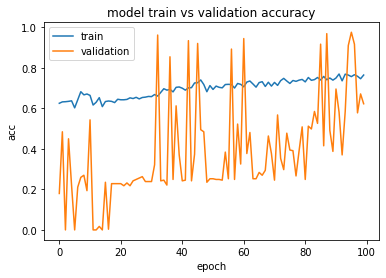

In [39]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history2.history['accuracy'])
pyplot.plot(history2.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

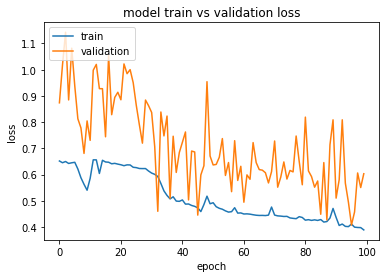

In [40]:
# plot train and validation loss
pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [41]:
X2_te = np.array(X2_te)
y2_te = np.array(y2_te)

In [42]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results2 = model2.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results2)

Evaluate on test data
160/160 [==============================] - 15s 87ms/step - loss: 0.3633 - accuracy: 0.8163 - auc: 0.8439
test loss, test acc test auc: [0.36331045627593994, 0.8162500262260437, 0.8439451456069946]


In [43]:
#Confusion Matrix
y_pred2 = model2.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred2>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1225  237]
 [  57   81]]


In [44]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred2)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.847305656337358


In [45]:
#test with source domain data
X1_te = np.array(X1_te)
y1_te = np.array(y1_te)

In [46]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results3 = model2.evaluate(X1_te, y1_te, batch_size=10)
print("test loss, test acc:", results3)

Evaluate on test data
367/367 [==============================] - 31s 85ms/step - loss: 1.2268 - accuracy: 0.4445 - auc: 0.8021
test loss, test acc: [1.226786732673645, 0.4445050358772278, 0.8021371364593506]


In [47]:
#Confusion Matrix
y_pred3 = model2.predict(X1_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_te, y_pred3>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[ 158   17]
 [2020 1472]]


In [48]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y1_te, y_pred3)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.8197152675503192


In [73]:
#We can continue training of ADFA-WD with a little, say 10% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model3 = load_model('model1.h5')
X2_tr_10,X2_tr_90,y2_tr_10,y2_tr_90 = train_test_split(X2_tr,y2_tr,test_size=0.9)
history3A = model3.fit(X2_tr_10, y2_tr_10, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_90,y2_tr_90))
model3.save('model3.h5')
print('Saved model to disk')

Epoch 1/50
15/15 - 16s - loss: 0.6303 - accuracy: 0.6875 - auc: 0.7995 - val_loss: 0.4665 - val_accuracy: 0.7554 - val_auc: 0.8726
Epoch 2/50
15/15 - 13s - loss: 0.4157 - accuracy: 0.7500 - auc: 0.8786 - val_loss: 0.4405 - val_accuracy: 0.7700 - val_auc: 0.8787
Epoch 3/50
15/15 - 13s - loss: 0.3615 - accuracy: 0.8125 - auc: 0.9102 - val_loss: 0.4362 - val_accuracy: 0.7746 - val_auc: 0.8840
Epoch 4/50
15/15 - 13s - loss: 0.3434 - accuracy: 0.8403 - auc: 0.9225 - val_loss: 0.4245 - val_accuracy: 0.7623 - val_auc: 0.8841
Epoch 5/50
15/15 - 14s - loss: 0.3021 - accuracy: 0.8750 - auc: 0.9474 - val_loss: 0.4227 - val_accuracy: 0.7923 - val_auc: 0.8870
Epoch 6/50
15/15 - 13s - loss: 0.2801 - accuracy: 0.9167 - auc: 0.9558 - val_loss: 0.4267 - val_accuracy: 0.7923 - val_auc: 0.8850
Epoch 7/50
15/15 - 13s - loss: 0.2629 - accuracy: 0.9167 - auc: 0.9599 - val_loss: 0.4231 - val_accuracy: 0.7877 - val_auc: 0.8833
Epoch 8/50
15/15 - 13s - loss: 0.2399 - accuracy: 0.9306 - auc: 0.9693 - val_loss: 

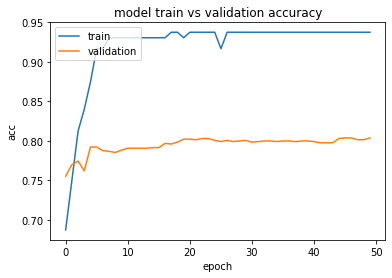

In [74]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3A.history['accuracy'])
pyplot.plot(history3A.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

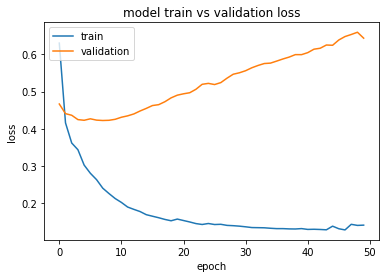

In [75]:
# plot train and validation loss
pyplot.plot(history3A.history['loss'])
pyplot.plot(history3A.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [76]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results4 = model3.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results4)

Evaluate on test data
160/160 [==============================] - 13s 84ms/step - loss: 0.7388 - accuracy: 0.7837 - auc: 0.8814
test loss, test acc test auc: [0.738840639591217, 0.7837499976158142, 0.8814162611961365]


In [77]:
#Confusion Matrix
y_pred4 = model3.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred4>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1139  323]
 [  23  115]]


In [78]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred4)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.8886228910168719


In [91]:
#We can continue training of ADFA-WD with a little, say 20% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model4 = load_model('model1.h5')
X2_tr_20,X2_tr_80,y2_tr_20,y2_tr_80 = train_test_split(X2_tr,y2_tr,test_size=0.8)
history3B = model4.fit(X2_tr_20, y2_tr_20, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_80,y2_tr_80))
model4.save('model4.h5')
print('Saved model to disk')

Epoch 1/50
29/29 - 17s - loss: 0.5589 - accuracy: 0.7465 - auc: 0.8529 - val_loss: 0.4074 - val_accuracy: 0.7690 - val_auc: 0.8868
Epoch 2/50
29/29 - 15s - loss: 0.3652 - accuracy: 0.8125 - auc: 0.9176 - val_loss: 0.3706 - val_accuracy: 0.8054 - val_auc: 0.9075
Epoch 3/50
29/29 - 14s - loss: 0.3054 - accuracy: 0.8611 - auc: 0.9450 - val_loss: 0.3705 - val_accuracy: 0.8227 - val_auc: 0.9066
Epoch 4/50
29/29 - 14s - loss: 0.2734 - accuracy: 0.8889 - auc: 0.9550 - val_loss: 0.3714 - val_accuracy: 0.8201 - val_auc: 0.9089
Epoch 5/50
29/29 - 15s - loss: 0.2599 - accuracy: 0.8819 - auc: 0.9591 - val_loss: 0.3708 - val_accuracy: 0.8218 - val_auc: 0.9108
Epoch 6/50
29/29 - 14s - loss: 0.2481 - accuracy: 0.8889 - auc: 0.9614 - val_loss: 0.3721 - val_accuracy: 0.8287 - val_auc: 0.9125
Epoch 7/50
29/29 - 15s - loss: 0.2346 - accuracy: 0.8924 - auc: 0.9637 - val_loss: 0.3808 - val_accuracy: 0.8279 - val_auc: 0.9129
Epoch 8/50
29/29 - 14s - loss: 0.2204 - accuracy: 0.8958 - auc: 0.9687 - val_loss: 

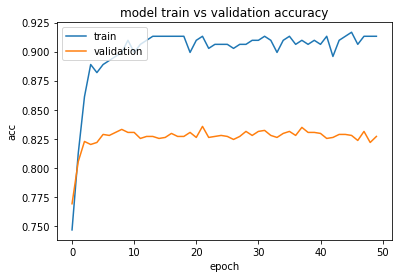

In [92]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3B.history['accuracy'])
pyplot.plot(history3B.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

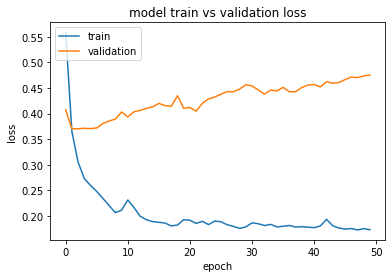

In [93]:
# plot train and validation loss
pyplot.plot(history3B.history['loss'])
pyplot.plot(history3B.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [94]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results5 = model4.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results5)

Evaluate on test data
160/160 [==============================] - 15s 85ms/step - loss: 0.6134 - accuracy: 0.7781 - auc: 0.9126
test loss, test acc test auc: [0.6133680939674377, 0.778124988079071, 0.912649393081665]


In [95]:
#Confusion Matrix
y_pred5 = model4.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred5>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1123  339]
 [  16  122]]


In [96]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred5)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9151598961121354


In [85]:
#We can continue training of ADFA-WD with a little, say 30% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model5 = load_model('model1.h5')
X2_tr_30,X2_tr_70,y2_tr_30,y2_tr_70 = train_test_split(X2_tr,y2_tr,test_size=0.7)
history3C = model5.fit(X2_tr_30, y2_tr_30, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_70,y2_tr_70))
model5.save('model5.h5')
print('Saved model to disk')

Epoch 1/50
44/44 - 19s - loss: 0.4726 - accuracy: 0.7390 - auc: 0.8709 - val_loss: 0.4002 - val_accuracy: 0.7923 - val_auc: 0.8920
Epoch 2/50
44/44 - 16s - loss: 0.3557 - accuracy: 0.8245 - auc: 0.9098 - val_loss: 0.3625 - val_accuracy: 0.8289 - val_auc: 0.9100
Epoch 3/50
44/44 - 16s - loss: 0.3144 - accuracy: 0.8314 - auc: 0.9281 - val_loss: 0.3564 - val_accuracy: 0.8328 - val_auc: 0.9141
Epoch 4/50
44/44 - 16s - loss: 0.2891 - accuracy: 0.8614 - auc: 0.9429 - val_loss: 0.3455 - val_accuracy: 0.8408 - val_auc: 0.9175
Epoch 5/50
44/44 - 16s - loss: 0.2758 - accuracy: 0.8614 - auc: 0.9501 - val_loss: 0.3441 - val_accuracy: 0.8328 - val_auc: 0.9199
Epoch 6/50
44/44 - 16s - loss: 0.2656 - accuracy: 0.8707 - auc: 0.9513 - val_loss: 0.3435 - val_accuracy: 0.8318 - val_auc: 0.9193
Epoch 7/50
44/44 - 17s - loss: 0.2529 - accuracy: 0.8822 - auc: 0.9567 - val_loss: 0.3416 - val_accuracy: 0.8358 - val_auc: 0.9231
Epoch 8/50
44/44 - 16s - loss: 0.2528 - accuracy: 0.8776 - auc: 0.9547 - val_loss: 

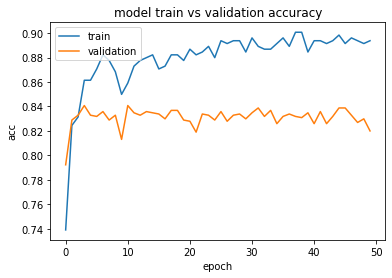

In [86]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3C.history['accuracy'])
pyplot.plot(history3C.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

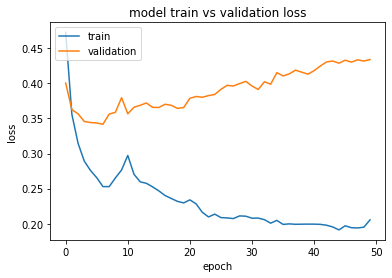

In [87]:
# plot train and validation loss
pyplot.plot(history3C.history['loss'])
pyplot.plot(history3C.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [88]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results6 = model5.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results6)

Evaluate on test data
160/160 [==============================] - 16s 84ms/step - loss: 0.4751 - accuracy: 0.7444 - auc: 0.9092
test loss, test acc test auc: [0.4751124083995819, 0.7443749904632568, 0.9091997742652893]


In [89]:
#Confusion Matrix
y_pred6 = model5.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred6>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1062  400]
 [   9  129]]


In [90]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred6)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9184906520747835


In [97]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model6 = load_model('model1.h5')
X2_tr_40,X2_tr_60,y2_tr_40,y2_tr_60 = train_test_split(X2_tr,y2_tr,test_size=0.6)
history3D = model6.fit(X2_tr_40, y2_tr_40, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_60,y2_tr_60))
model5.save('model5.h5')
print('Saved model to disk')

Epoch 1/50
58/58 - 21s - loss: 0.4724 - accuracy: 0.7452 - auc: 0.8610 - val_loss: 0.3719 - val_accuracy: 0.7832 - val_auc: 0.8993
Epoch 2/50
58/58 - 17s - loss: 0.3425 - accuracy: 0.8302 - auc: 0.9184 - val_loss: 0.3370 - val_accuracy: 0.8351 - val_auc: 0.9219
Epoch 3/50
58/58 - 18s - loss: 0.2986 - accuracy: 0.8614 - auc: 0.9416 - val_loss: 0.3321 - val_accuracy: 0.8304 - val_auc: 0.9241
Epoch 4/50
58/58 - 17s - loss: 0.2827 - accuracy: 0.8596 - auc: 0.9473 - val_loss: 0.3317 - val_accuracy: 0.8316 - val_auc: 0.9250
Epoch 5/50
58/58 - 17s - loss: 0.2766 - accuracy: 0.8510 - auc: 0.9476 - val_loss: 0.3213 - val_accuracy: 0.8374 - val_auc: 0.9285
Epoch 6/50
58/58 - 17s - loss: 0.2693 - accuracy: 0.8562 - auc: 0.9489 - val_loss: 0.3416 - val_accuracy: 0.8212 - val_auc: 0.9200
Epoch 7/50
58/58 - 17s - loss: 0.2685 - accuracy: 0.8596 - auc: 0.9493 - val_loss: 0.3332 - val_accuracy: 0.8270 - val_auc: 0.9222
Epoch 8/50
58/58 - 18s - loss: 0.2863 - accuracy: 0.8562 - auc: 0.9442 - val_loss: 

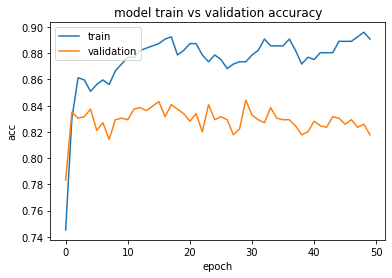

In [98]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3D.history['accuracy'])
pyplot.plot(history3D.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

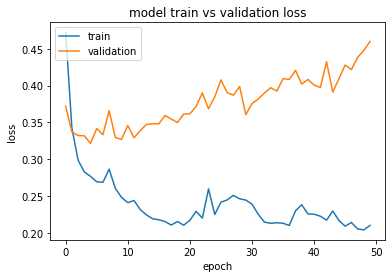

In [99]:
# plot train and validation loss
pyplot.plot(history3D.history['loss'])
pyplot.plot(history3D.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [100]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results7 = model6.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results7)

Evaluate on test data
160/160 [==============================] - 15s 86ms/step - loss: 0.4952 - accuracy: 0.8006 - auc: 0.9107
test loss, test acc test auc: [0.4951706826686859, 0.8006250262260437, 0.9106792211532593]


In [101]:
#Confusion Matrix
y_pred7 = model6.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred7>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1164  298]
 [  21  117]]


In [102]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred7)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9126915680326733


In [103]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model7 = load_model('model1.h5')
X2_tr_50r,X2_tr_50e,y2_tr_50r,y2_tr_50e = train_test_split(X2_tr,y2_tr,test_size=0.5)
history3E = model7.fit(X2_tr_50r, y2_tr_50r, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_50e,y2_tr_50e))
model7.save('model7.h5')
print('Saved model to disk')

Epoch 1/50
73/73 - 22s - loss: 0.4460 - accuracy: 0.7632 - auc: 0.8697 - val_loss: 0.3590 - val_accuracy: 0.8380 - val_auc: 0.9223
Epoch 2/50
73/73 - 19s - loss: 0.3285 - accuracy: 0.8324 - auc: 0.9275 - val_loss: 0.3545 - val_accuracy: 0.8338 - val_auc: 0.9209
Epoch 3/50
73/73 - 19s - loss: 0.2944 - accuracy: 0.8435 - auc: 0.9433 - val_loss: 0.3444 - val_accuracy: 0.8463 - val_auc: 0.9266
Epoch 4/50
73/73 - 19s - loss: 0.2822 - accuracy: 0.8504 - auc: 0.9474 - val_loss: 0.3560 - val_accuracy: 0.8338 - val_auc: 0.9210
Epoch 5/50
73/73 - 21s - loss: 0.2866 - accuracy: 0.8352 - auc: 0.9449 - val_loss: 0.3569 - val_accuracy: 0.8338 - val_auc: 0.9226
Epoch 6/50
73/73 - 19s - loss: 0.2774 - accuracy: 0.8490 - auc: 0.9481 - val_loss: 0.3345 - val_accuracy: 0.8380 - val_auc: 0.9280
Epoch 7/50
73/73 - 19s - loss: 0.2671 - accuracy: 0.8601 - auc: 0.9492 - val_loss: 0.3541 - val_accuracy: 0.8310 - val_auc: 0.9230
Epoch 8/50
73/73 - 19s - loss: 0.2689 - accuracy: 0.8518 - auc: 0.9485 - val_loss: 

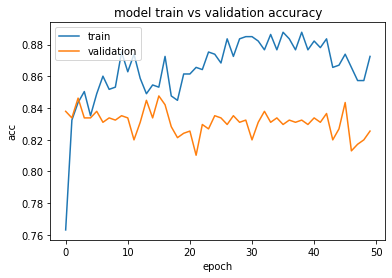

In [104]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3E.history['accuracy'])
pyplot.plot(history3E.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

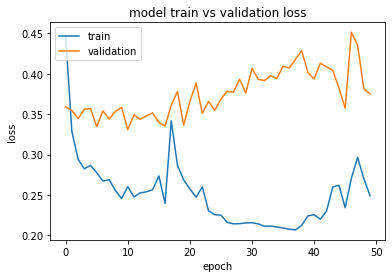

In [105]:
# plot train and validation loss
pyplot.plot(history3E.history['loss'])
pyplot.plot(history3E.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [107]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results8 = model7.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results8)

Evaluate on test data
160/160 [==============================] - 16s 84ms/step - loss: 0.3974 - accuracy: 0.7931 - auc: 0.9201
test loss, test acc test auc: [0.3973911702632904, 0.7931249737739563, 0.9201164245605469]


In [106]:
#Confusion Matrix
y_pred8 = model7.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred8>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1154  308]
 [  23  115]]


In [108]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred8)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9205575051051765


In [109]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model8 = load_model('model1.h5')
X2_tr_60,X2_tr_40,y2_tr_60,y2_tr_40 = train_test_split(X2_tr,y2_tr,test_size=0.4)
history3F = model8.fit(X2_tr_60, y2_tr_60, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_40,y2_tr_40))
model8.save('model8.h5')
print('Saved model to disk')

Epoch 1/50
87/87 - 23s - loss: 0.4369 - accuracy: 0.7725 - auc: 0.8743 - val_loss: 0.3399 - val_accuracy: 0.8235 - val_auc: 0.9183
Epoch 2/50
87/87 - 20s - loss: 0.3235 - accuracy: 0.8453 - auc: 0.9308 - val_loss: 0.3412 - val_accuracy: 0.8131 - val_auc: 0.9163
Epoch 3/50
87/87 - 21s - loss: 0.2885 - accuracy: 0.8522 - auc: 0.9447 - val_loss: 0.3257 - val_accuracy: 0.8287 - val_auc: 0.9264
Epoch 4/50
87/87 - 20s - loss: 0.2704 - accuracy: 0.8476 - auc: 0.9507 - val_loss: 0.3274 - val_accuracy: 0.8322 - val_auc: 0.9273
Epoch 5/50
87/87 - 20s - loss: 0.2534 - accuracy: 0.8707 - auc: 0.9561 - val_loss: 0.3330 - val_accuracy: 0.8339 - val_auc: 0.9263
Epoch 6/50
87/87 - 21s - loss: 0.2535 - accuracy: 0.8811 - auc: 0.9563 - val_loss: 0.3234 - val_accuracy: 0.8443 - val_auc: 0.9307
Epoch 7/50
87/87 - 21s - loss: 0.2434 - accuracy: 0.8764 - auc: 0.9582 - val_loss: 0.3295 - val_accuracy: 0.8426 - val_auc: 0.9293
Epoch 8/50
87/87 - 20s - loss: 0.2303 - accuracy: 0.8799 - auc: 0.9637 - val_loss: 

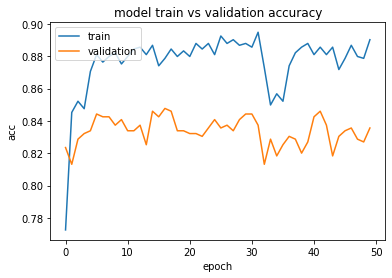

In [110]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3F.history['accuracy'])
pyplot.plot(history3F.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

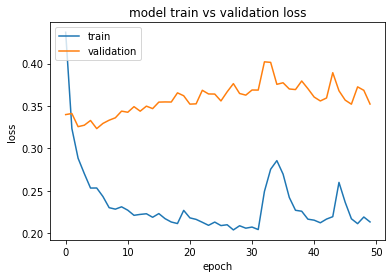

In [111]:
# plot train and validation loss
pyplot.plot(history3F.history['loss'])
pyplot.plot(history3F.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [112]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results9 = model8.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results9)

Evaluate on test data
160/160 [==============================] - 15s 87ms/step - loss: 0.4269 - accuracy: 0.8119 - auc: 0.9224
test loss, test acc test auc: [0.4269074499607086, 0.8118749856948853, 0.9223911762237549]


In [113]:
#Confusion Matrix
y_pred9 = model8.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred9>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1183  279]
 [  22  116]]


In [114]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred9)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9221832312298024


In [116]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model9 = load_model('model1.h5')
X2_tr_70,X2_tr_30,y2_tr_70,y2_tr_30 = train_test_split(X2_tr,y2_tr,test_size=0.3)
history3G = model9.fit(X2_tr_70, y2_tr_70, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_30,y2_tr_30))
model9.save('model9.h5')
print('Saved model to disk')

Epoch 1/50
101/101 - 26s - loss: 0.4214 - accuracy: 0.7901 - auc: 0.8870 - val_loss: 0.3689 - val_accuracy: 0.8134 - val_auc: 0.9058
Epoch 2/50
101/101 - 22s - loss: 0.3361 - accuracy: 0.8356 - auc: 0.9259 - val_loss: 0.3367 - val_accuracy: 0.8134 - val_auc: 0.9193
Epoch 3/50
101/101 - 22s - loss: 0.2950 - accuracy: 0.8594 - auc: 0.9429 - val_loss: 0.3234 - val_accuracy: 0.8226 - val_auc: 0.9233
Epoch 4/50
101/101 - 22s - loss: 0.2770 - accuracy: 0.8594 - auc: 0.9475 - val_loss: 0.3330 - val_accuracy: 0.8272 - val_auc: 0.9238
Epoch 5/50
101/101 - 22s - loss: 0.2826 - accuracy: 0.8624 - auc: 0.9461 - val_loss: 0.3309 - val_accuracy: 0.8134 - val_auc: 0.9234
Epoch 6/50
101/101 - 22s - loss: 0.2779 - accuracy: 0.8663 - auc: 0.9469 - val_loss: 0.3348 - val_accuracy: 0.8157 - val_auc: 0.9262
Epoch 7/50
101/101 - 22s - loss: 0.2565 - accuracy: 0.8703 - auc: 0.9546 - val_loss: 0.3335 - val_accuracy: 0.8295 - val_auc: 0.9242
Epoch 8/50
101/101 - 21s - loss: 0.2410 - accuracy: 0.8802 - auc: 0.9

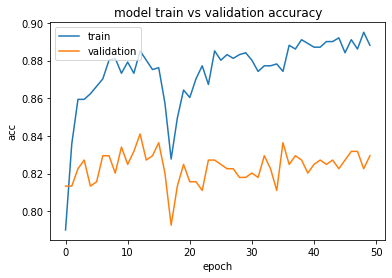

In [117]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3G.history['accuracy'])
pyplot.plot(history3G.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

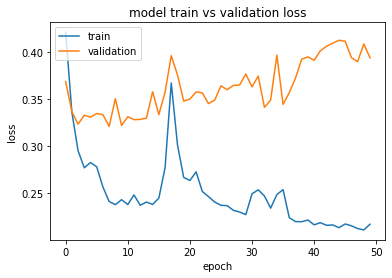

In [118]:
# plot train and validation loss
pyplot.plot(history3G.history['loss'])
pyplot.plot(history3G.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [119]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results10 = model9.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results10)

Evaluate on test data
160/160 [==============================] - 15s 87ms/step - loss: 0.4766 - accuracy: 0.8306 - auc: 0.9246
test loss, test acc test auc: [0.47655636072158813, 0.8306249976158142, 0.9245672821998596]


In [120]:
#Confusion Matrix
y_pred10 = model9.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred10>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1208  254]
 [  17  121]]


In [121]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred10)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9275511013303198


In [122]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model10 = load_model('model1.h5')
X2_tr_80,X2_tr_20,y2_tr_80,y2_tr_20 = train_test_split(X2_tr,y2_tr,test_size=0.2)
history3H = model10.fit(X2_tr_80, y2_tr_80, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_20,y2_tr_20))
model10.save('model10.h5')
print('Saved model to disk')

Epoch 1/50
116/116 - 27s - loss: 0.4071 - accuracy: 0.7913 - auc: 0.8917 - val_loss: 0.3455 - val_accuracy: 0.8235 - val_auc: 0.9135
Epoch 2/50
116/116 - 23s - loss: 0.3133 - accuracy: 0.8424 - auc: 0.9328 - val_loss: 0.3327 - val_accuracy: 0.8304 - val_auc: 0.9246
Epoch 3/50
116/116 - 23s - loss: 0.2911 - accuracy: 0.8485 - auc: 0.9421 - val_loss: 0.3136 - val_accuracy: 0.8374 - val_auc: 0.9350
Epoch 4/50
116/116 - 24s - loss: 0.2978 - accuracy: 0.8433 - auc: 0.9386 - val_loss: 0.3340 - val_accuracy: 0.8201 - val_auc: 0.9206
Epoch 5/50
116/116 - 24s - loss: 0.2858 - accuracy: 0.8502 - auc: 0.9411 - val_loss: 0.3208 - val_accuracy: 0.8131 - val_auc: 0.9224
Epoch 6/50
116/116 - 23s - loss: 0.2680 - accuracy: 0.8597 - auc: 0.9477 - val_loss: 0.3327 - val_accuracy: 0.8270 - val_auc: 0.9215
Epoch 7/50
116/116 - 23s - loss: 0.2605 - accuracy: 0.8675 - auc: 0.9505 - val_loss: 0.2880 - val_accuracy: 0.8443 - val_auc: 0.9370
Epoch 8/50
116/116 - 23s - loss: 0.2517 - accuracy: 0.8710 - auc: 0.9

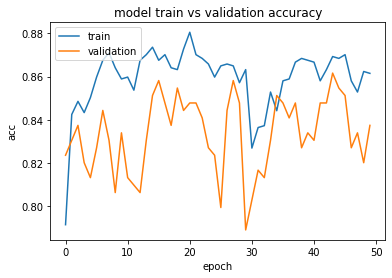

In [123]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3H.history['accuracy'])
pyplot.plot(history3H.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

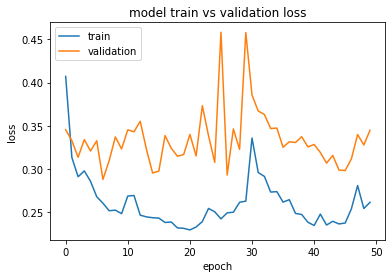

In [124]:
# plot train and validation loss
pyplot.plot(history3H.history['loss'])
pyplot.plot(history3H.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [125]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results11 = model10.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results11)

Evaluate on test data
160/160 [==============================] - 15s 87ms/step - loss: 0.3668 - accuracy: 0.8125 - auc: 0.9191
test loss, test acc test auc: [0.36679595708847046, 0.8125, 0.9191226363182068]


In [126]:
#Confusion Matrix
y_pred11 = model10.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred11>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1183  279]
 [  21  117]]


In [127]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred11)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9213703681674895


In [128]:
#We can continue training of ADFA-WD with a little, say 40% of ADFA-WD:SAA train to achieve domain adaptation
K.clear_session()
from keras.models import load_model
model11 = load_model('model1.h5')
X2_tr_90,X2_tr_10,y2_tr_90,y2_tr_10 = train_test_split(X2_tr,y2_tr,test_size=0.1)
history3I = model11.fit(X2_tr_90, y2_tr_90, batch_size=10, epochs=50, verbose=2, validation_data=(X2_tr_10,y2_tr_10))
model11.save('model11.h5')
print('Saved model to disk')

Epoch 1/50
130/130 - 27s - loss: 0.4105 - accuracy: 0.7837 - auc: 0.8881 - val_loss: 0.4390 - val_accuracy: 0.7655 - val_auc: 0.8725
Epoch 2/50
130/130 - 25s - loss: 0.3205 - accuracy: 0.8337 - auc: 0.9300 - val_loss: 0.3981 - val_accuracy: 0.7862 - val_auc: 0.9107
Epoch 3/50
130/130 - 25s - loss: 0.2926 - accuracy: 0.8437 - auc: 0.9413 - val_loss: 0.3885 - val_accuracy: 0.8483 - val_auc: 0.9105
Epoch 4/50
130/130 - 24s - loss: 0.2915 - accuracy: 0.8414 - auc: 0.9403 - val_loss: 0.3197 - val_accuracy: 0.8621 - val_auc: 0.9380
Epoch 5/50
130/130 - 24s - loss: 0.2690 - accuracy: 0.8537 - auc: 0.9484 - val_loss: 0.3453 - val_accuracy: 0.8207 - val_auc: 0.9282
Epoch 6/50
130/130 - 24s - loss: 0.2576 - accuracy: 0.8591 - auc: 0.9527 - val_loss: 0.3472 - val_accuracy: 0.8000 - val_auc: 0.9319
Epoch 7/50
130/130 - 25s - loss: 0.2539 - accuracy: 0.8576 - auc: 0.9524 - val_loss: 0.3645 - val_accuracy: 0.8414 - val_auc: 0.9203
Epoch 8/50
130/130 - 25s - loss: 0.2760 - accuracy: 0.8476 - auc: 0.9

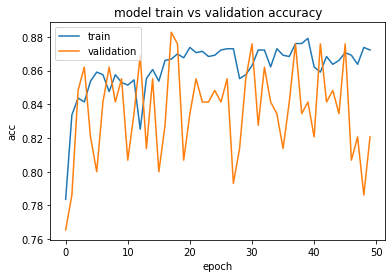

In [129]:
# plot train and validation accuracy
from matplotlib import pyplot
pyplot.plot(history3I.history['accuracy'])
pyplot.plot(history3I.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

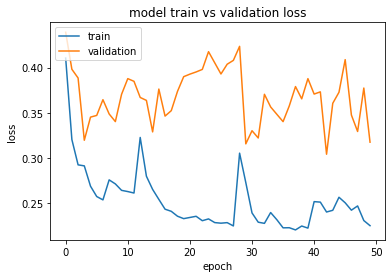

In [130]:
# plot train and validation loss
pyplot.plot(history3I.history['loss'])
pyplot.plot(history3I.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [131]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results11 = model10.evaluate(X2_te, y2_te, batch_size=10)
print("test loss, test acc test auc:", results11)

Evaluate on test data
160/160 [==============================] - 14s 87ms/step - loss: 0.3668 - accuracy: 0.8125 - auc: 0.9191
test loss, test acc test auc: [0.36679595708847046, 0.8125, 0.9191226363182068]


In [132]:
#Confusion Matrix
y_pred12 = model11.predict(X2_te)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_te, y_pred12>0.5)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1022  440]
 [   5  133]]


In [133]:
#AUC Score
from sklearn.metrics import roc_curve
fpr_keras,tpr_keras, thresholds_keras = roc_curve(y2_te, y_pred12)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras,tpr_keras)
print('AUC score')
print(auc_keras)

AUC score
0.9272537124050835


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')